In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Custom dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data).float()
        self.targets = torch.tensor(targets.values).long()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y

class MLP_1(torch.nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )
    
    def forward(self,x):
        return self.model(x)
        
class MLP_2(torch.nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        
    def forward(self, x):
        return self.model(x)
        
class MLP_3(torch.nn.Module):
    def __init__(self):
        super(MLP_3, self).__init__()
        self.model=nn.Sequential(
            nn.Flatten(),
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )        

    def forward(self, x):
        return self.model(x)

In [3]:
# Load the Breast Cancer Wisconsin dataset
data = pd.read_csv('data.csv')
data['class'] = [1 if x == 'M' else 0 for x in data['diagnosis']]
X = data.drop(columns=['diagnosis','id','Unnamed: 32','class'])
y = data['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#Scaling the variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create custom dataset instances
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
test_dataset = BreastCancerDataset(X_test_scaled, y_test)

# Set the hyperparameters
learning_rate = 0.0001
num_epochs = 10
batch_size = 16

# Create data loaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Create an instance of the MLP model
model = MLP_1()

# Define the class weights
class_weights = torch.tensor([1, 10]).float()  # Convert to FloatTensor

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.7380
Epoch [1/10], Step [10/29], Loss: 0.6382
Epoch [1/10], Step [15/29], Loss: 0.6355
Epoch [1/10], Step [20/29], Loss: 0.6935
Epoch [1/10], Step [25/29], Loss: 0.6668
Epoch [2/10], Step [5/29], Loss: 0.6395
Epoch [2/10], Step [10/29], Loss: 0.6068
Epoch [2/10], Step [15/29], Loss: 0.5228
Epoch [2/10], Step [20/29], Loss: 0.5799
Epoch [2/10], Step [25/29], Loss: 0.5557
Epoch [3/10], Step [5/29], Loss: 0.5706
Epoch [3/10], Step [10/29], Loss: 0.4206
Epoch [3/10], Step [15/29], Loss: 0.4001
Epoch [3/10], Step [20/29], Loss: 0.4966
Epoch [3/10], Step [25/29], Loss: 0.5130
Epoch [4/10], Step [5/29], Loss: 0.4613
Epoch [4/10], Step [10/29], Loss: 0.4060
Epoch [4/10], Step [15/29], Loss: 0.5412
Epoch [4/10], Step [20/29], Loss: 0.4103
Epoch [4/10], Step [25/29], Loss: 0.3273
Epoch [5/10], Step [5/29], Loss: 0.4488
Epoch [5/10], Step [10/29], Loss: 0.2657
Epoch [5/10], Step [15/29], Loss: 0.3459
Epoch [5/10], Step [20/29], Loss: 0.3775
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.8772


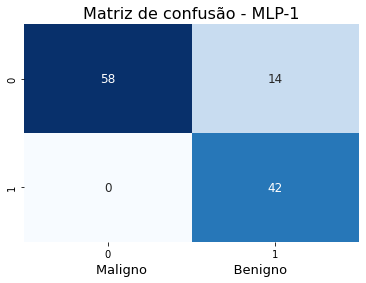

In [5]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão - MLP-1', fontsize=16)

# Save the confusion matrix plot as PNG
plt.savefig('confusion_matrix_MLP1.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [6]:
# Create an instance of the MLP model
model = MLP_2()

# Define the class weights
class_weights = torch.tensor([1, 10]).float()  # Convert to FloatTensor

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.6912
Epoch [1/10], Step [10/29], Loss: 0.7469
Epoch [1/10], Step [15/29], Loss: 0.7067
Epoch [1/10], Step [20/29], Loss: 0.7140
Epoch [1/10], Step [25/29], Loss: 0.6962
Epoch [2/10], Step [5/29], Loss: 0.6364
Epoch [2/10], Step [10/29], Loss: 0.6112
Epoch [2/10], Step [15/29], Loss: 0.5722
Epoch [2/10], Step [20/29], Loss: 0.5238
Epoch [2/10], Step [25/29], Loss: 0.5565
Epoch [3/10], Step [5/29], Loss: 0.5310
Epoch [3/10], Step [10/29], Loss: 0.5065
Epoch [3/10], Step [15/29], Loss: 0.4745
Epoch [3/10], Step [20/29], Loss: 0.4594
Epoch [3/10], Step [25/29], Loss: 0.4685
Epoch [4/10], Step [5/29], Loss: 0.3693
Epoch [4/10], Step [10/29], Loss: 0.3906
Epoch [4/10], Step [15/29], Loss: 0.5536
Epoch [4/10], Step [20/29], Loss: 0.3596
Epoch [4/10], Step [25/29], Loss: 0.2848
Epoch [5/10], Step [5/29], Loss: 0.2975
Epoch [5/10], Step [10/29], Loss: 0.3297
Epoch [5/10], Step [15/29], Loss: 0.2938
Epoch [5/10], Step [20/29], Loss: 0.3864
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.8947


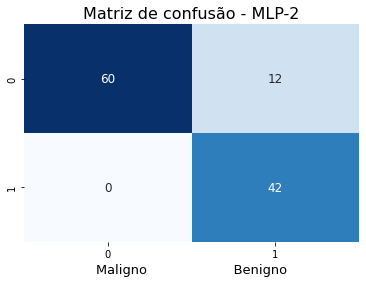

In [7]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão - MLP-2', fontsize=16)

# Save the confusion matrix plot as PNG
plt.savefig('confusion_matrix_MLP2.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [8]:
# Create an instance of the MLP model
model = MLP_3()

# Define the class weights
class_weights = torch.tensor([1, 10]).float()  # Convert to FloatTensor

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.6136
Epoch [1/10], Step [10/29], Loss: 0.6194
Epoch [1/10], Step [15/29], Loss: 0.5923
Epoch [1/10], Step [20/29], Loss: 0.5920
Epoch [1/10], Step [25/29], Loss: 0.5895
Epoch [2/10], Step [5/29], Loss: 0.5658
Epoch [2/10], Step [10/29], Loss: 0.5570
Epoch [2/10], Step [15/29], Loss: 0.5556
Epoch [2/10], Step [20/29], Loss: 0.6246
Epoch [2/10], Step [25/29], Loss: 0.5731
Epoch [3/10], Step [5/29], Loss: 0.6051
Epoch [3/10], Step [10/29], Loss: 0.4917
Epoch [3/10], Step [15/29], Loss: 0.5143
Epoch [3/10], Step [20/29], Loss: 0.4610
Epoch [3/10], Step [25/29], Loss: 0.4673
Epoch [4/10], Step [5/29], Loss: 0.4832
Epoch [4/10], Step [10/29], Loss: 0.4453
Epoch [4/10], Step [15/29], Loss: 0.4780
Epoch [4/10], Step [20/29], Loss: 0.4795
Epoch [4/10], Step [25/29], Loss: 0.4191
Epoch [5/10], Step [5/29], Loss: 0.4009
Epoch [5/10], Step [10/29], Loss: 0.3020
Epoch [5/10], Step [15/29], Loss: 0.3977
Epoch [5/10], Step [20/29], Loss: 0.3205
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.8947


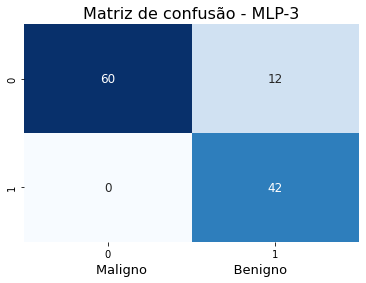

In [9]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão - MLP-3', fontsize=16)

# Save the confusion matrix plot as SVG
plt.savefig('confusion_matrix_MLP3.png', format='png', bbox_inches='tight', dpi=300)

plt.show()